# Source Light Plot

In [1]:
import pickle
import numpy as np

names = ['J0806+2006', 'J1442+4055', 'J1515+1511', 'J1620+1203', 'J2325-5229']

# LaTeX header
print("\\begin{table}[htb]")
print("\\centering")
print("\\caption{F160W best-fit source light model parameters}")
print("\\label{tab:source_light_params_f814w}")
print("\\begin{tabular}lcccc}")
print("\\hline")
print("Lens System & $R_{\\text{S\\'ersic}}$ [arcsec] & $n_{\\text{S\\'ersic}}$ & $q$ \\\\")
print("\\hline")

for i, name in enumerate(names):
    filename = f"../joint_modeling/{name}/{name}_joint.pkl"
    with open(filename, "rb") as f:
        loaded_data = pickle.load(f)

    chain_list = loaded_data.get('chain_list')
    sampler_type, samples_mcmc, param_mcmc, dist_mcmc = chain_list[3]

    param_names = ['R_sersic_source_light0', 'n_sersic_source_light0', 'e1_source_light0', 'e2_source_light0']
    indices = [param_mcmc.index(p) for p in param_names]

    r_chain = samples_mcmc[:, indices[0]]
    n_chain = samples_mcmc[:, indices[1]]
    e1_chain = samples_mcmc[:, indices[2]]
    e2_chain = samples_mcmc[:, indices[3]]

    e_chain = np.sqrt(e1_chain**2 + e2_chain**2)
    q_chain = (1 - e_chain) / (1 + e_chain)

    def get_median_and_uncertainties(samples):
        median = np.percentile(samples, 50)
        lower = median - np.percentile(samples, 16)
        upper = np.percentile(samples, 84) - median
        return median, lower, upper

    r_median, r_lower, r_upper = get_median_and_uncertainties(r_chain)
    n_median, n_lower, n_upper = get_median_and_uncertainties(n_chain)
    q_median, q_lower, q_upper = get_median_and_uncertainties(q_chain)

    # Print table row
    print(f"{name} & "
          f"${r_median:.2f}^{{+{r_upper:.2f}}}_{{-{r_lower:.2f}}}$ & "
          f"${n_median:.2f}^{{+{n_upper:.2f}}}_{{-{n_lower:.2f}}}$ & "
          f"${q_median:.2f}^{{+{q_upper:.2f}}}_{{-{q_lower:.2f}}}$ & \\\\")

print("\\hline")
print("\\end{tabular}")
print("\\end{table}")


\begin{table}[htb]
\centering
\caption{F160W best-fit source light model parameters}
\label{tab:source_light_params_f814w}
\begin{tabular}lcccc}
\hline
Lens System & $R_{\text{S\'ersic}}$ [arcsec] & $n_{\text{S\'ersic}}$ & $q$ \\
\hline
J0806+2006 & $0.23^{+0.02}_{-0.02}$ & $0.79^{+0.12}_{-0.10}$ & $0.33^{+0.02}_{-0.01}$ & \\
J1442+4055 & $0.31^{+0.01}_{-0.01}$ & $0.51^{+0.02}_{-0.01}$ & $0.79^{+0.02}_{-0.02}$ & \\
J1515+1511 & $0.43^{+0.01}_{-0.01}$ & $0.97^{+0.17}_{-0.17}$ & $0.35^{+0.02}_{-0.01}$ & \\
J1620+1203 & $0.31^{+0.01}_{-0.01}$ & $1.66^{+0.10}_{-0.08}$ & $0.90^{+0.05}_{-0.04}$ & \\
J2325-5229 & $1.95^{+0.02}_{-0.25}$ & $2.22^{+0.05}_{-0.08}$ & $0.93^{+0.01}_{-0.02}$ & \\
\hline
\end{tabular}
\end{table}


-8.730030198632656 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  8.730030198632658
-16.615349492699963 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  16.61534949269996
-2.437292598810847 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  2.4372925988108465
-0.8185785107311209 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  0.8185785107311206
-1.877767610928843 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.8777676109288448


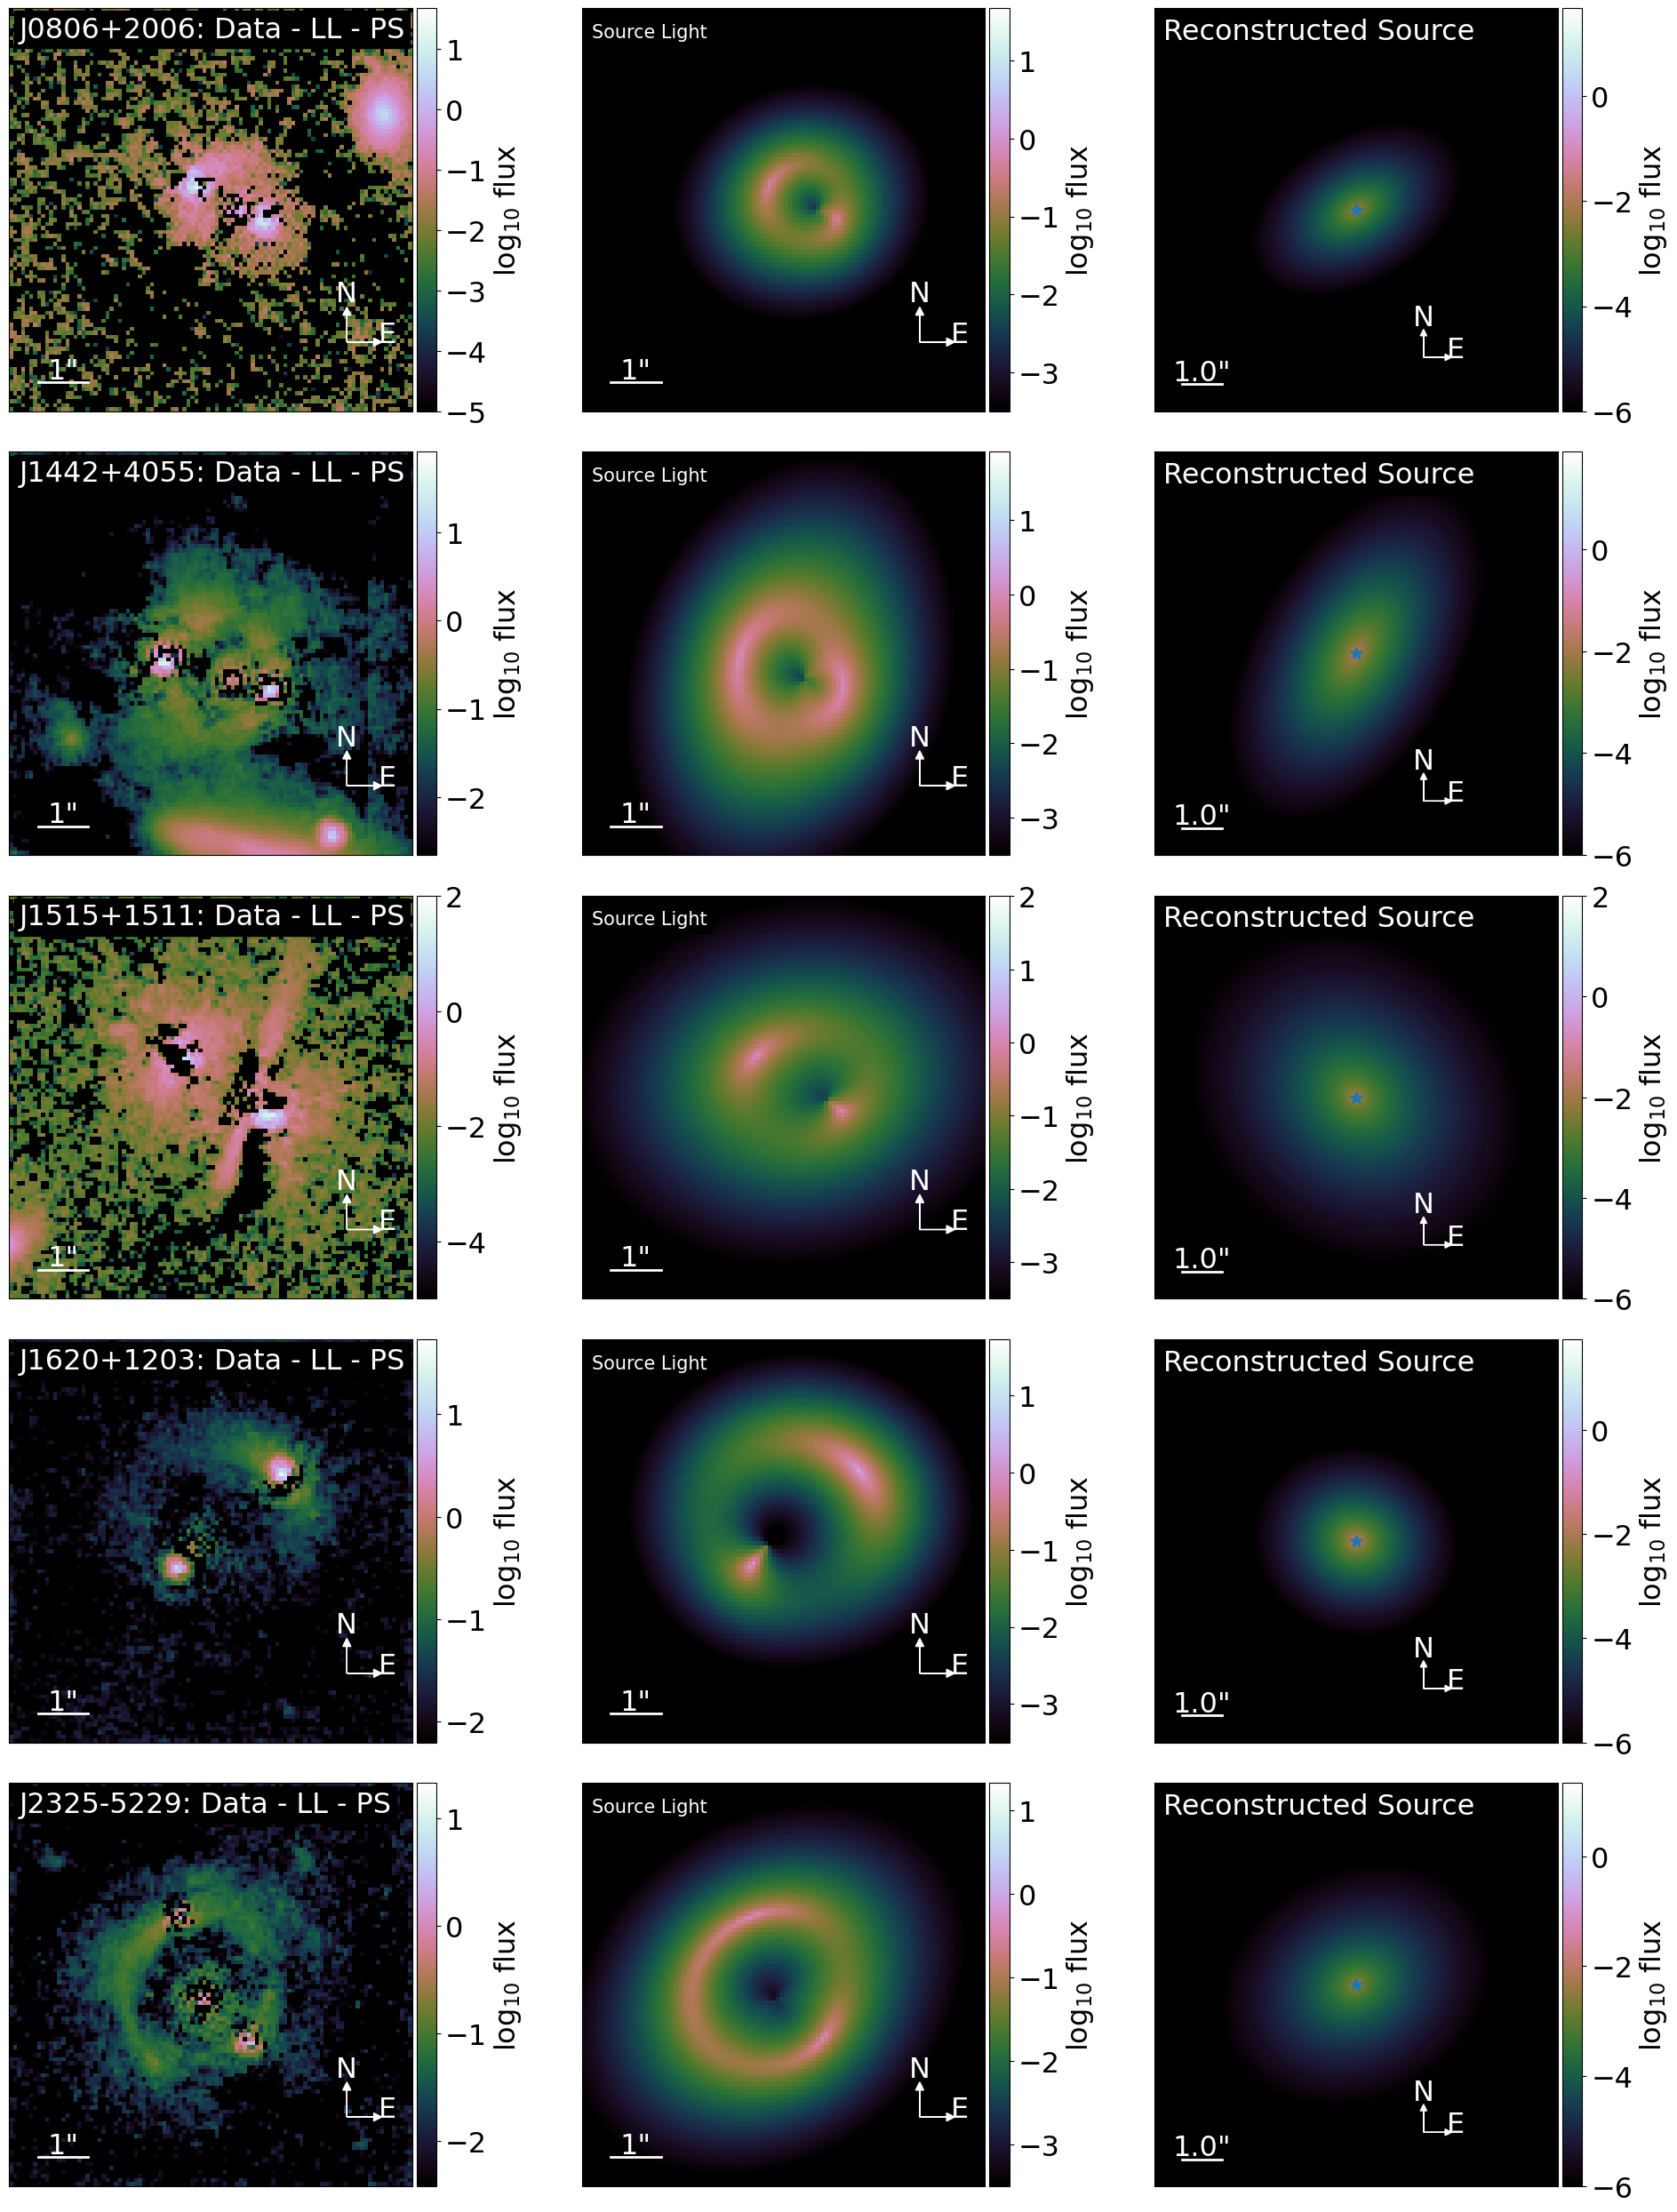

In [20]:
import pickle
import matplotlib.pyplot as plt
from lenstronomy.Plots.model_plot import ModelPlot

# define filters and system names
names = ['J0806+2006', 'J1442+4055', 'J1515+1511', 'J1620+1203', 'J2325-5229']
filter = 'F160W'
fontsize = 23

nrows = len(names)
fig, axes = plt.subplots(nrows, 3, figsize=(20, 25))

for i, name in enumerate(names):
    filename = f"../cutout_data/{name}/{filter}/{name}_{filter}.pkl"

    with open(filename, "rb") as f:
        loaded_data = pickle.load(f)

    kwargs_result = loaded_data["kwargs_result"]
    multi_band_list = loaded_data["multi_band_list"]
    kwargs_model = loaded_data["kwargs_model"]

    # ynitialize model plot
    modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string="cubehelix")

    # generate separate component plots
    modelPlot.decomposition_plot(
            ax=axes[i, 1], text="Source Light", source_add=True, unconvolved=True, v_min = -3.5, font_size = fontsize
        )    
    modelPlot.source_plot(
            ax=axes[i, 2], text="Reconstructed Source", deltaPix_source=0.01, numPix=1000, v_min = -6., scale_size = 1, font_size = fontsize
        )    
    modelPlot.subtract_from_data_plot(
            ax=axes[i, 0], text=f"{name}: Data - LL - PS", lens_light_add=True, point_source_add = True, font_size = fontsize
        )
    
plt.tight_layout()
#plt.subplots_adjust(wspace=0.28, hspace=0.05)

plt.show()


-1.4754381161508605 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  2.6538060741370324
reduced chi^2 of data  1 =  1.206911662422579
reduced chi^2 of data  2 =  1.1571773875839504


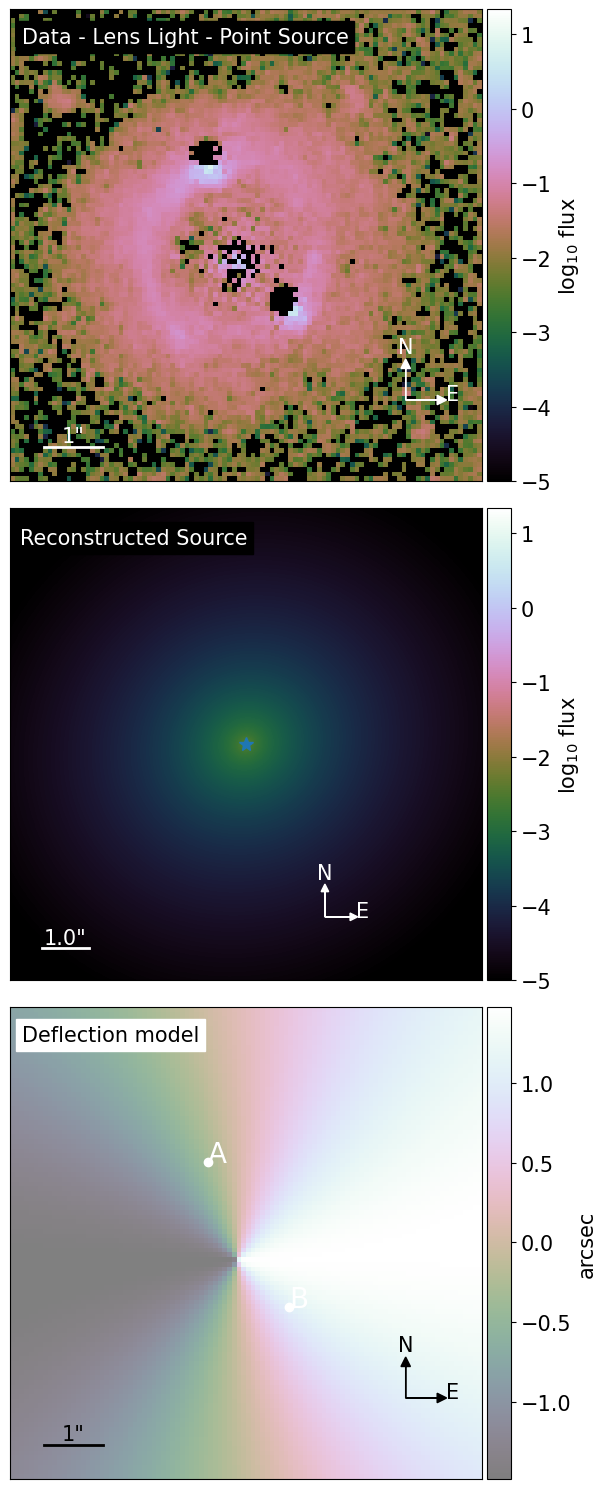

In [5]:
import pickle
import matplotlib.pyplot as plt
from lenstronomy.Plots.model_plot import ModelPlot

# define filters and system names
name = 'J2325-5229'
filter = 'F160W'
fontsize = 20

fig, axes = plt.subplots(3, 1, figsize=(15, 15))


filename = f"../joint_modeling/{name}/{name}_joint.pkl"

with open(filename, "rb") as f:
    loaded_data = pickle.load(f)

kwargs_result = loaded_data["kwargs_result"]
multi_band_list = loaded_data["multi_band_list"]
kwargs_model = loaded_data["kwargs_model"]
mask_list = loaded_data['kwargs_likelihood']['image_likelihood_mask_list']

    # initialize model plot
modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, image_likelihood_mask_list=mask_list, arrow_size=0.02, cmap_string="cubehelix")

    # generate separate component plots
modelPlot.subtract_from_data_plot(
            ax=axes[0], text=f"Data - Lens Light - Point Source", lens_light_add=True, point_source_add = True, band_index = 0
        )
modelPlot.source_plot(
            ax=axes[1], text="Reconstructed Source", deltaPix_source=0.01, numPix=1000, v_min = -5., scale_size = 1, band_index = 0
        )    

modelPlot.deflection_plot(ax=axes[2], band_index = 0)

plt.tight_layout()
#plt.subplots_adjust(wspace=0.28, hspace=0.05)

plt.show()


/Users/rbrady0110/micromamba/envs/doubles/lib/python3.13/site-packages/lenstronomy/Data/psf.py:95: UserWarning: Input PSF model has at least one negative element, which is unphysical except for a PSF of an interferometric array.
  warnings.warn(
/Users/rbrady0110/micromamba/envs/doubles/lib/python3.13/site-packages/lenstronomy/Plots/model_band_plot.py:68: RuntimeWarning: invalid value encountered in log10
  log_model = np.log10(model)


-8.730030198632656 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  8.730030198632658
-16.615349492699963 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  16.61534949269996
-2.437292598810847 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  2.4372925988108465
-0.8185785107311209 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  0.8185785107311206
-1.877767610928843 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.8777676109288448


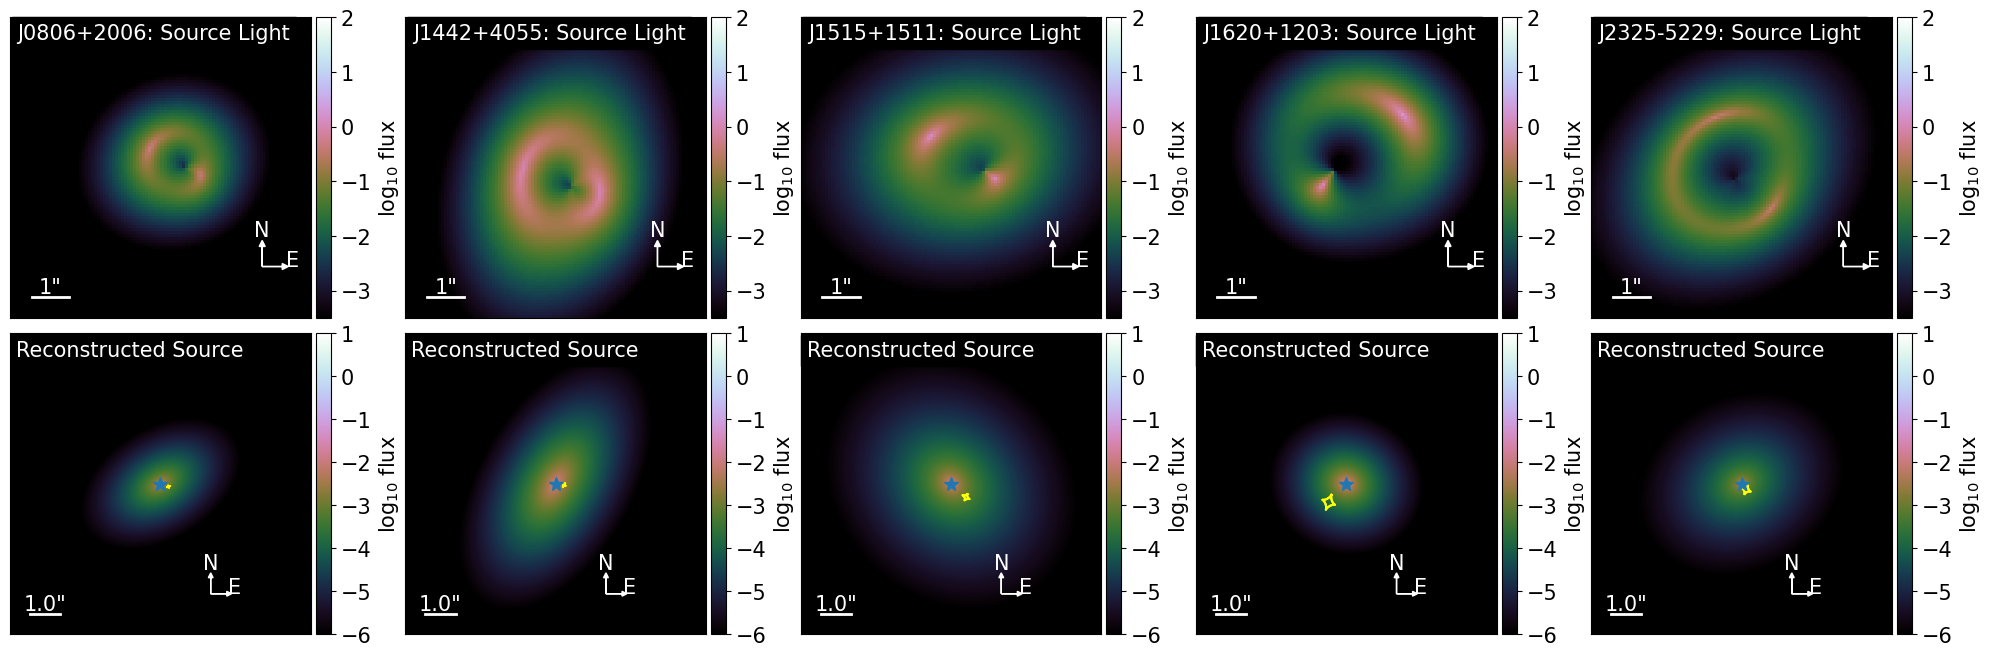

In [ ]:
import pickle
import matplotlib.pyplot as plt
from lenstronomy.Plots.model_plot import ModelPlot

# define filters and system names
names = ['J0806+2006', 'J1442+4055', 'J1515+1511', 'J1620+1203', 'J2325-5229']
filter = 'F160W'
fontsize = 20

nrows = len(names)
fig, axes = plt.subplots(2, nrows, figsize=(20, 20/3))

for i, name in enumerate(names):
    filename = f"../cutout_data/{name}/{filter}/{name}_{filter}.pkl"

    with open(filename, "rb") as f:
        loaded_data = pickle.load(f)

    kwargs_result = loaded_data["kwargs_result"]
    multi_band_list = loaded_data["multi_band_list"]
    kwargs_model = loaded_data["kwargs_model"]

    # ynitialize model plot
    modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string="cubehelix")

    # generate separate component plots
    modelPlot.decomposition_plot(
            ax=axes[0, i], text=f"{name}: Source Light", source_add=True, unconvolved=True, v_max = 2., v_min = -3.5
        )    
    modelPlot.source_plot(
            ax=axes[1, i], text="Reconstructed Source", deltaPix_source=0.01, numPix=1000, v_max = 1, v_min = -6., scale_size = 1
        )    

    
plt.tight_layout()
#plt.subplots_adjust(wspace=0.28, hspace=0.05)

plt.show()
